# Credit EDA Case Study
## Submitted By: Alex Anthraper & Amit Haldar

## Bckground:


   #### - Cases when company may face the financial loss
    - If the applicant is likely to repay, but not approving the loan
    - If the applicant is not likely to repay, but approving the loan
   #### - Two types of scenarios of the loan applicants
    - The client with payment difficulties: late payment more than X days on at least one of the first  Y instalments of the loan
    - All other cases: All other cases when the payment is paid on time.
   
   #### - When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

    - Approved, Cancelled (by the client due to a higher risk), Refused (rejected by the company), Unused offer (approved but cancelled by the client at the later stage) 
    
## Business Objectives: 

### Analysing the patterns in the consumer and loan application data using EDA for ensuring, whether or not, the applicants are capable of repaying the loans and are not rejected

    - To identify patterns indicating difficulties in paying installments because of:
        - Denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate

    - In other words, the company wants to identify and understand the driving factors (variables) an indicators for possible loan defaults

#### Importing required libraries

In [1]:
#import the warnings.
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [4]:
curr_app0 = pd.read_csv('data/application_data.csv')
prev_app0 = pd.read_csv('data/previous_application.csv')

### Steps to follow (Note: No need to do the imputation)

##### Shall be applied in application csv file
1. Check with the normal routine (head, shae, info, describe etc.)
2. Finding the % of the null values in all columns
3. Drop the columns more than 50% (>=50%)
4. Identify 5 columns with <=13% missing values and identify the best possible values for imputing (just for reporting)
5. Identify the columns with incorrect datatype (At least 10 columns) - Conversions
   - Categorical data shall be object dtype
   - Continuous data shall be in int/float dtype
   - Negative age or date to positives using absolute values
6. Min 5 columns (numerical) identify the outliers (no treatment for outliers is required)
7. Creating bins from a continuous data (minimum two columns)

8. Whether the data is imbalance, if yes what is the percentage (Target column)
9. Create two dataframes using target column (0, 1). Then do the univariate and bivariate analysis
    - We can take only 20-25 columns for performing univariate and bivariate analysis
    - Univariate: Categorical/Continuous
    - Bivariate: 
        - Categorical - Categorical
        - Categorical - Continuous
        - Continuous - Continuous
    - min 5 plots for each analysis (Total 25 plots)
10. Using these two sub dataframes we need to identify correlations (min 10 variables)

##### Previous application csv file (Target Column is Contract Status)
1. No need to perform any cleaning steps in the previous application data
2. We can either merge it with the application data or we can perform analysis separately
3. We need to directly perform all univariate and bivariate analysis
4. Finally we will have to take out the inferences
5. Prepare the final presentation including the results and inferences and recommendations to the bank

### Q1. Data overview: Normal routine check (head, shape, info, describe etc.)

In [5]:
print(curr_app0.shape)
print(prev_app0.shape)

(307511, 122)
(1670214, 37)


In [6]:
print(curr_app0.info)
print(prev_app0.info)

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12    

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
5           1383531      199383         Cash loans    23703.930   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
10          1715995      447712         Cash loans    11368.620   
11          2257824      161140         Cash loans    13832.775   
12          2330894      258628         Cash loans    12165.210   
13          1397919      32167

In [7]:
curr_app0.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Q2. Finding the % of the null values in all columns

In [8]:
curr_app0.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

#### Since curr_app0.isnull().sum()/len(curr_app0) = mean
#### Therefore, we can directly use the mean function

In [9]:
# Percentage of null values in each columns - Descending order
curr_app_null = curr_app0.isnull().mean().round(4)*100
curr_app_null.sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [10]:
# Columns with more than 50% null values
curr_app_50nullcols = curr_app_null[curr_app_null > 50]
curr_app_50nullcols = list(curr_app_50nullcols.index)
curr_app_50nullcols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

### Q3. Drop the columns more than 50% (>=50%)
#### Creating new databse by dropping the columns with more than 50% null values

In [11]:
curr_app1 = curr_app0.drop(curr_app_50nullcols, axis=1)
curr_app1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [12]:
curr_app1[curr_app1.AMT_GOODS_PRICE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

### Q4. Identify 5 columns with <=13% missing values and identify the best possible values for imputing (just for reporting)

In [13]:
curr_app_13null = curr_app_null[(curr_app_null <= 13) & (curr_app_null > 0)]
curr_app_13nullcols = list(curr_app_13null.index)
curr_app_13nullcols

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

#### AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given
#### NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan
#### EXT_SOURCE_2 - Normalized score from external data source
#### OBS_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 30 DPD (days past due) default
#### OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default
#### DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD

In [14]:
curr_app1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [15]:
curr_app1.AMT_GOODS_PRICE.isnull().value_counts()

False    307233
True        278
Name: AMT_GOODS_PRICE, dtype: int64

### Imputing criteria for the variable AMT_GOODS_PRICE

In [16]:
curr_app1.groupby('NAME_FAMILY_STATUS')['AMT_GOODS_PRICE'].mean()

NAME_FAMILY_STATUS
Civil marriage          481445.256580
Married                 580014.475645
Separated               492932.941388
Single / not married    451637.545399
Unknown                           NaN
Widow                   436491.560750
Name: AMT_GOODS_PRICE, dtype: float64

In [17]:
curr_app1.groupby('NAME_FAMILY_STATUS')[curr_app_13nullcols].count()

AMT_GOODS_PRICE  NAME_TYPE_SUITE  EXT_SOURCE_2  \
NAME_FAMILY_STATUS                                                     
Civil marriage                  29751            29661         29692   
Married                        196265           195648        196044   
Separated                       19757            19695         19735   
Single / not married            45386            45200         45339   
Unknown                             0                0             2   
Widow                           16074            16015         16039   

                      OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
NAME_FAMILY_STATUS                                                         
Civil marriage                           29680                     29680   
Married                                 195837                    195837   
Separated                                19698                     19698   
Single / not married                     45226                     45226   
Unknown                                      2                         2   
Widow                                    16047                     16047   

                      OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
NAME_FAMILY_STATUS                                                        
Civil marriage                           29680                     29680  
Married                                 195837                    195837  
Separated                                19698                     19698  
Single / not married                     45226                     45226  
Unknown                                      2                         2  
Widow                                    16047                     16047

In [18]:
curr_app1.groupby('NAME_HOUSING_TYPE')['AMT_GOODS_PRICE'].mean()

NAME_HOUSING_TYPE
Co-op apartment        523209.375000
House / apartment      544424.295919
Municipal apartment    529643.080333
Office apartment       562619.863480
Rented apartment       470120.409967
With parents           453444.967380
Name: AMT_GOODS_PRICE, dtype: float64

In [19]:
curr_app1.groupby('NAME_HOUSING_TYPE')[curr_app_13nullcols].count()

AMT_GOODS_PRICE  NAME_TYPE_SUITE  EXT_SOURCE_2  \
NAME_HOUSING_TYPE                                                     
Co-op apartment                 1120             1113          1119   
House / apartment             272634           271719        272307   
Municipal apartment            11166            11147         11147   
Office apartment                2615             2603          2609   
Rented apartment                4876             4863          4870   
With parents                   14822            14774         14799   

                     OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
NAME_HOUSING_TYPE                                                         
Co-op apartment                          1116                      1116   
House / apartment                      271960                    271960   
Municipal apartment                     11151                     11151   
Office apartment                         2605                      2605   
Rented apartment                         4859                      4859   
With parents                            14799                     14799   

                     OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
NAME_HOUSING_TYPE                                                        
Co-op apartment                          1116                      1116  
House / apartment                      271960                    271960  
Municipal apartment                     11151                     11151  
Office apartment                         2605                      2605  
Rented apartment                         4859                      4859  
With parents                            14799                     14799

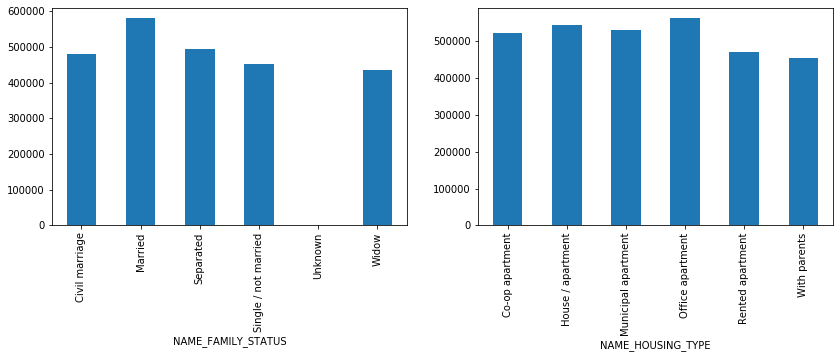

In [20]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1.groupby('NAME_FAMILY_STATUS')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.subplot(1,2,2)
curr_app1.groupby('NAME_HOUSING_TYPE')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.show()

### Inferences 
#### For imputing AMT_GOODS_PRICE
- Majority of the clients are married and have houses or apartments with an average goods price > 500,000
- Therefore, all missing values under AMT_GOODS_PRICE column can be imputed with the value of 500,000

### Imputing criteria for the variable NAME_TYPE_SUITE

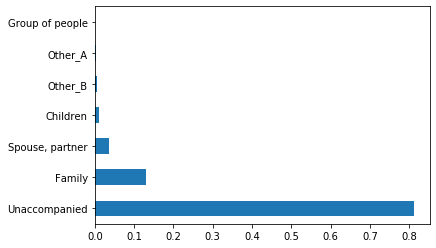

In [21]:
curr_app1['NAME_TYPE_SUITE'].value_counts(normalize=True).plot.barh()
plt.show()

### Inferences 
#### For imputing NAME_TYPE_SUITE
- Since majority of the clients were unaccompained (81%) during loan application. Therefore, missing values under NAME_TRYPE_SUITE can be imputed with "Unaccompained".

### Imputing criteria for the variable EXT_SOURCE_2

In [22]:
curr_app1['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [23]:
curr_app1.groupby('NAME_INCOME_TYPE')[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','EXT_SOURCE_2']].mean()

AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE  \
NAME_INCOME_TYPE                                                        
Businessman              652500.000000  1.228500e+06     1.228500e+06   
Commercial associate     202955.327289  6.699131e+05     6.031804e+05   
Maternity leave          140400.000000  7.497000e+05     7.497000e+05   
Pensioner                136401.292273  5.425461e+05     4.881586e+05   
State servant            179737.969506  6.698193e+05     6.024241e+05   
Student                  170500.000000  5.107875e+05     4.582500e+05   
Unemployed               110536.363636  7.643864e+05     7.643864e+05   
Working                  163169.889223  5.770110e+05     5.178644e+05   

                      EXT_SOURCE_2  
NAME_INCOME_TYPE                    
Businessman               0.666350  
Commercial associate      0.542199  
Maternity leave           0.512095  
Pensioner                 0.506451  
State servant             0.534559  
Student                   0.500003  
Unemployed                0.459349  
Working                   0.501860

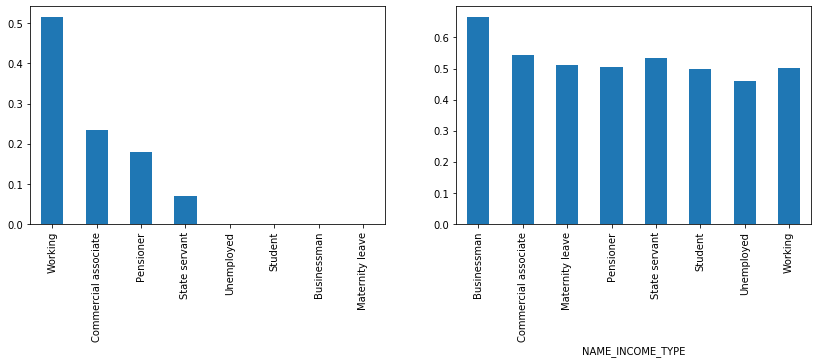

In [24]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
curr_app1.groupby('NAME_INCOME_TYPE')['EXT_SOURCE_2'].mean().plot.bar()
plt.show()

### Inferences 
#### For imputing EXT_SOURCE_2 
- The income type of the majority clients are falling in working, commercial associates and pensioner (~93%). The average scores from the external sources for these income type categories are 0.5. Therefore, the null values can be imputed with the score 0.5.

### Imputing criteria for the variables
##### - OBS_30_CNT_SOCIAL_CIRCLE 
##### - OBS_60_CNT_SOCIAL_CIRCLE
##### - DEF_60_CNT_SOCIAL_CIRCLE

In [25]:
curr_app1[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  1.405292   
std                    2.400989                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  2.000000   
max                  348.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000  
mean                   0.100049  
std                    0.362291  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                   24.000000

### Inferences 
#### For imputing observed and actual defaulters are present in client's social surroundings 
- 75% of the clients surrounding is with maximum '2' defaulters under observed 30-60 DPD and with '0' actual defaulters under 60 DPD

### Q5. Identify the columns with incorrect datatype (At least 10 columns) - Conversions
   - Categorical data shall be object dtype
   - Continuous data shall be in int/float dtype
   - Negative age or date to positives using absolute values

In [26]:
for c in curr_app1.columns:
    print("\n---- %s ---" % c)
    print(curr_app1[c].value_counts())
    print("Data Type: %s" % curr_app1[c].dtypes)


---- SK_ID_CURR ---
100303    1
131861    1
158488    1
156441    1
160539    1
150300    1
148253    1
154398    1
152351    1
238369    1
244514    1
242467    1
230181    1
236326    1
234279    1
254761    1
260906    1
135959    1
133908    1
248620    1
144147    1
176899    1
166660    1
164613    1
170758    1
168711    1
191240    1
189193    1
195338    1
193291    1
183052    1
181005    1
187150    1
185103    1
142096    1
146194    1
258859    1
246573    1
437376    1
107361    1
111459    1
101220    1
105318    1
103271    1
125800    1
123753    1
129898    1
127851    1
117612    1
115565    1
121710    1
119663    1
437120    1
435073    1
441218    1
113506    1
109408    1
252718    1
217919    1
250671    1
207664    1
205617    1
211762    1
209715    1
199476    1
197429    1
203574    1
201527    1
224056    1
222009    1
228154    1
226107    1
215868    1
219966    1
172801    1
174848    1
348927    1
297668    1
322248    1
320201    1
326346    1
324299 

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
900000.0     6246
254700.0     4500
545040.0     4437
808650.0     4152
135000.0     3660
755190.0     3524
1125000.0    3493
521280.0     3175
284400.0     3096
1078200.0    2856
454500.0     2649
1288350.0    2613
269550.0     2463
202500.0     2339
781920.0     2328
1350000.0    2321
239850.0     2084
315000.0     2072
247500.0     2057
640080.0     2041
1006920.0    1883
540000.0     1821
360000.0     1743
508495.5     1717
592560.0     1688
497520.0     1665
405000.0     1661
835380.0     1600
337500.0     1588
679500.0     1555
942300.0     1431
314100.0     1394
152820.0     1366
1546020.0    1279
495000.0     1268
157500.0     1203
585000.0     1200
728460.0     1065
526491.0     1012
544491.0     1009
343800.0      939
1223010.0     930
312768.0      929
247275.0      920
1800000.0     900
814041.0      897
630000.0      895
490495.5      842
101880.0      841
263686.5      827
760225.5  

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
Data Type: object

---- REGION_POPULATION_RELATIVE ---
0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
0.010966     3110
0.011657     3080
0.010147     3079
0.010643     3012
0.007330     2980
0.007120     2861
0.006629     2818
0.009175     2770
0.010500     2680
0.010276     2601
0.00965

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Data Type: object

---- HOUR_APPR_PROCESS_START ---
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64
Data Type: int64

---- REG_REGION_NOT_LIVE_REGION ---
0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
Data Type: int64

---- REG_REGION_NOT_WORK_REGION ---
0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
Data Type: int64

---- LIVE_REGION_NOT_WORK_REGION ---
0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
Data Type: int64

---- REG_CITY_NOT_LIVE_CITY ---
0    2834

0.9871    4311
0.9856    4189
0.9861    4171
0.9801    4123
0.9866    4114
0.9806    4096
0.9851    4096
0.9811    3986
0.9816    3982
0.9831    3970
0.9876    3942
0.9796    3933
0.9841    3881
0.9821    3872
0.9846    3856
0.9791    3846
0.9836    3803
0.9781    3728
0.9786    3666
0.9826    3648
0.9776    3460
0.9771    3441
0.9881    3425
0.9767    3180
0.9762    3003
0.9886    2897
0.9742    2876
0.9757    2783
0.9747    2754
0.9752    2739
0.9737    2708
0.9896    2477
0.9732    2464
0.9891    2442
0.9727    2277
0.9722    1954
0.9901    1932
0.9906    1540
0.9717    1493
0.9911    1199
0.9970    1110
0.9980    1096
0.9712    1078
0.9975    1074
0.9985    1062
0.9916     986
0.9990     906
0.9965     902
0.9921     882
0.9707     867
0.9960     853
0.9702     835
0.9925     784
0.9955     762
0.9930     754
0.9697     738
0.9945     719
0.9692     709
0.9935     709
0.9950     696
0.9995     691
0.9940     648
0.9518     621
0.9687     520
0.0000     514
0.9682     499
0.9677    

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-329.0       203
-358.0       203
-293.0       202
-350.0       201
-399.0       200
-441.0       200
-404.0       199
-463.0       198
-9.0         198
-11.0        198
-301.0       197
-496.0       195
-362.0       195
-304.0       195
-483.0       195
-308.0       195
-355.0       194
-500.0       194
-391.0       193
-427.0       193
-334.0       193
-347.0       192
-448.0       192
-415.0       191
-413.0       191
-447.0       190
-546.0       190
-469.0       190
-499.0       189
-566.0       188
-353.0       188
-428.0       187
-420.0       187
-417.0       186
-315.0       186
-475.0       186
-574.0       186
-511.0       185
-296.0       185
-534.0       185
-484.0       185
-454.0       185
-509.0       184
-291.0       183
-421.0       1

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
Data Type: float64

---- AMT_REQ_CREDIT_BUREAU_QRT ---
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
Data Type: float64

---- AMT_REQ_CREDIT_BUREAU_YEAR ---
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0     

In [27]:
wrong_type_list = ['DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
print("No of cols with wrong dtypes is: %s" % len(wrong_type_list))
right_type_list = [int, int, int, int, int, int, int, int, int, int, int, int, int]
print("length of right_type_list is: %s" % len(wrong_type_list))

print(curr_app1[wrong_type_list].dtypes)


No of cols with wrong dtypes is: 13
length of right_type_list is: 13
DAYS_REGISTRATION             float64
CNT_FAM_MEMBERS               float64
OBS_30_CNT_SOCIAL_CIRCLE      float64
DEF_30_CNT_SOCIAL_CIRCLE      float64
OBS_60_CNT_SOCIAL_CIRCLE      float64
DEF_60_CNT_SOCIAL_CIRCLE      float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object


In [28]:
type_map_zip = zip(wrong_type_list, right_type_list)
type_map_dict = dict(type_map_zip)
type_map_dict

{'DAYS_REGISTRATION': int,
 'CNT_FAM_MEMBERS': int,
 'OBS_30_CNT_SOCIAL_CIRCLE': int,
 'DEF_30_CNT_SOCIAL_CIRCLE': int,
 'OBS_60_CNT_SOCIAL_CIRCLE': int,
 'DEF_60_CNT_SOCIAL_CIRCLE': int,
 'DAYS_LAST_PHONE_CHANGE': int,
 'AMT_REQ_CREDIT_BUREAU_HOUR': int,
 'AMT_REQ_CREDIT_BUREAU_DAY': int,
 'AMT_REQ_CREDIT_BUREAU_WEEK': int,
 'AMT_REQ_CREDIT_BUREAU_MON': int,
 'AMT_REQ_CREDIT_BUREAU_QRT': int,
 'AMT_REQ_CREDIT_BUREAU_YEAR': int}

In [29]:
curr_app1 = curr_app1.fillna(0).astype(type_map_dict)
print(curr_app1[wrong_type_list].dtypes)

DAYS_REGISTRATION             int64
CNT_FAM_MEMBERS               int64
OBS_30_CNT_SOCIAL_CIRCLE      int64
DEF_30_CNT_SOCIAL_CIRCLE      int64
OBS_60_CNT_SOCIAL_CIRCLE      int64
DEF_60_CNT_SOCIAL_CIRCLE      int64
DAYS_LAST_PHONE_CHANGE        int64
AMT_REQ_CREDIT_BUREAU_HOUR    int64
AMT_REQ_CREDIT_BUREAU_DAY     int64
AMT_REQ_CREDIT_BUREAU_WEEK    int64
AMT_REQ_CREDIT_BUREAU_MON     int64
AMT_REQ_CREDIT_BUREAU_QRT     int64
AMT_REQ_CREDIT_BUREAU_YEAR    int64
dtype: object


#### Conversion from negative values to absolute

In [30]:
curr_app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637              -3648   
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [31]:
curr_app1[['DAYS_BIRTH', 
           'DAYS_EMPLOYED', 
           'DAYS_REGISTRATION', 
           'DAYS_ID_PUBLISH',
          'DAYS_LAST_PHONE_CHANGE']] = curr_app1[['DAYS_BIRTH', 
                                            'DAYS_EMPLOYED', 
                                            'DAYS_REGISTRATION', 
                                            'DAYS_ID_PUBLISH',
                                            'DAYS_LAST_PHONE_CHANGE']].abs()
                                                                                                
                                                                                                
curr_app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### Q6. Min 5 columns (numerical) identify the outliers (no treatment for outliers is required)

In [32]:
curr_app1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [33]:
cols_outliers = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2']

### Methodology for identifying outliers
- Check for the normality of the distribution
- If it is normal distribution we would use the parametric tests and z-score method can be used to identify outliers
- If not normal then we can use either IQR method or Gubbs test to identify the outliers

In [34]:
df_outliers = curr_app1[cols_outliers]
df_outliers.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  EXT_SOURCE_2
0          202500.0    406597.5      24700.5         351000.0      0.262949
1          270000.0   1293502.5      35698.5        1129500.0      0.622246
2           67500.0    135000.0       6750.0         135000.0      0.555912
3          135000.0    312682.5      29686.5         297000.0      0.650442
4          121500.0    513000.0      21865.5         513000.0      0.322738

In [35]:
df_outliers.describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307511.000000     3.075110e+05   
mean       1.687979e+05  5.990260e+05   27107.516051     5.379095e+05   
std        2.371231e+05  4.024908e+05   14494.443757     3.696338e+05   
min        2.565000e+04  4.500000e+04       0.000000     0.000000e+00   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

        EXT_SOURCE_2  
count  307511.000000  
mean        0.513289  
std         0.192334  
min         0.000000  
25%         0.390782  
50%         0.565467  
75%         0.663422  
max         0.855000

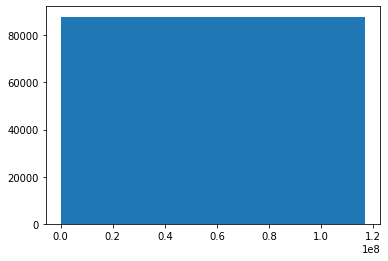

In [36]:
plt.hist(df_outliers.AMT_INCOME_TOTAL, bins=[25650, 50000, 100000, 112500, 125000, 147150, 202500, 117000000])
plt.show()

In [37]:
from scipy import stats
import statsmodels.api as sm
import pylab

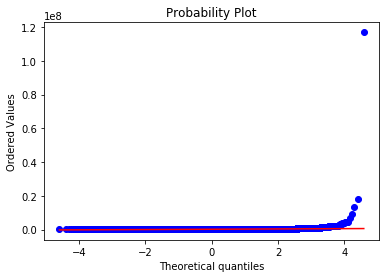

In [38]:
stats.probplot(df_outliers.AMT_INCOME_TOTAL, dist="norm", plot=plt)
plt.show()

- Clearly the Q-Q plot suggesting the the curve is positively skewed and after 20 percentile the values are pretty extreme
- We can also utilize the Shaprio hypothesis test to justify that the distribution is not normal

In [39]:
from scipy.stats import shapiro

In [40]:
stat, p = shapiro(df_outliers.AMT_INCOME_TOTAL)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.138, p=0.000


- H0 => There is normality in the distribution
- H1 => Distribution is not normal
- Here p-value<0.05 which means we can reject the H0. Therefore, the distribution is not normal
- In this case we need to perform the non-parametric test

In [41]:
df_outliers.AMT_INCOME_TOTAL.quantile([0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75])

0.05     67500.0
0.10     81000.0
0.15     90000.0
0.20     99000.0
0.25    112500.0
0.50    147150.0
0.75    202500.0
Name: AMT_INCOME_TOTAL, dtype: float64

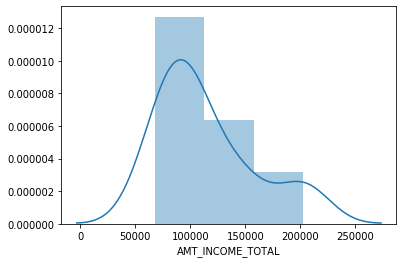

In [42]:
sns.distplot(df_outliers.AMT_INCOME_TOTAL.quantile([0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75]))
plt.show()

#### IQR Method for identifying the outliers

In [43]:
income_Q1 = df_outliers.AMT_INCOME_TOTAL.quantile(0.25)
income_Q3 = df_outliers.AMT_INCOME_TOTAL.quantile(0.75)

In [44]:
IQR_income =  income_Q3 - income_Q1
IQR_income

90000.0

In [45]:
income_min_out = abs(income_Q1 - IQR_income*1.5)
income_min_out

22500.0

In [46]:
income_max_out = income_Q3 + IQR_income*1.5
income_max_out

337500.0

#### We can now remove all values below 22500 and above 337500 from "AMT_INCOME_TOTAL" as outliers


#### Alternative method: Grubbs method to identify outliers
- from outliers import smirnov_grubbs as grubbs
- grubbs.test(df_outliers.AMT_INCOME_TOTAL, alpha=0.05)
- grubbs.min_test_indices(df_outliers.AMT_INCOME_TOTAL, alpha=0.05)
- grubbs.max_test_indices(df_outliers.AMT_INCOME_TOTAL, alpha=0.05)

Similary we apply the same method in other variables as well
- Columns: AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, EXT_SOURCE_2

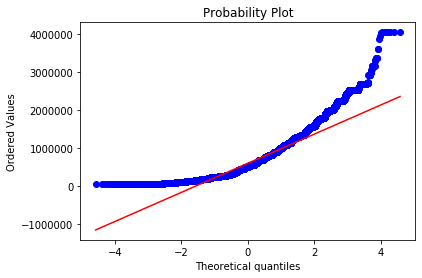

In [47]:
stats.probplot(df_outliers.AMT_CREDIT, dist="norm", plot=plt)
plt.show()

Extreme outliers in both lower and upper ends

In [48]:
credit_Q1 = df_outliers.AMT_CREDIT.quantile(0.25)
credit_Q3 = df_outliers.AMT_CREDIT.quantile(0.75)

In [49]:
IQR_credit =  credit_Q3 - credit_Q1
IQR_income

90000.0

In [50]:
credit_min_out = abs(credit_Q1 - IQR_credit*1.5)
credit_min_out

537975.0

In [51]:
credit_max_out = credit_Q3 + IQR_credit*1.5
credit_max_out

1616625.0

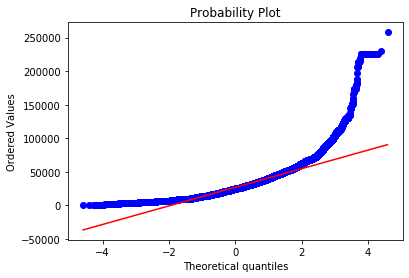

In [52]:
stats.probplot(df_outliers.AMT_ANNUITY, dist="norm", plot=plt)
plt.show()

In [53]:
annuity_Q1 = df_outliers.AMT_ANNUITY.quantile(0.25)
annuity_Q3 = df_outliers.AMT_ANNUITY.quantile(0.75)
IQR_annuity =  annuity_Q3 - annuity_Q1

In [54]:
annuity_min_out = abs(annuity_Q1 - IQR_annuity*1.5)
annuity_min_out


10584.0

In [55]:
annuity_max_out = annuity_Q3 + IQR_annuity*1.5
annuity_max_out

61704.0

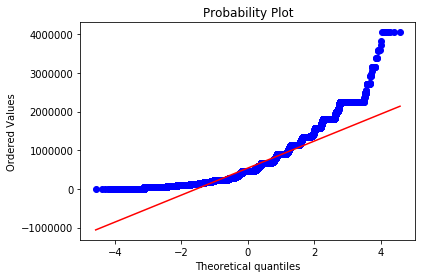

In [56]:
stats.probplot(df_outliers.AMT_GOODS_PRICE, dist="norm", plot=plt)
plt.show()

In [57]:
goods_Q1 = df_outliers.AMT_GOODS_PRICE.quantile(0.25)
goods_Q3 = df_outliers.AMT_GOODS_PRICE.quantile(0.75)
IQR_goods =  goods_Q3 - goods_Q1

In [58]:
goods_min_out = abs(goods_Q1 - IQR_goods*1.5)
goods_min_out

423000.0

In [59]:
goods_max_out = goods_Q3 + IQR_goods*1.5
goods_max_out

1341000.0

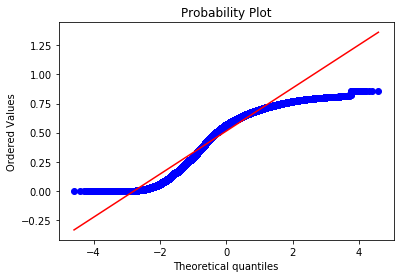

In [60]:
stats.probplot(df_outliers.EXT_SOURCE_2, dist="norm", plot=plt)
plt.show()

In [61]:
score_Q1 = df_outliers.EXT_SOURCE_2.quantile(0.25)
score_Q3 = df_outliers.EXT_SOURCE_2.quantile(0.75)
IQR_score =  score_Q3 - score_Q1

In [62]:
score_min_out = abs(score_Q1 - IQR_score*1.5)
score_min_out

0.01817672256009728

In [63]:
score_max_out = score_Q3 + IQR_score*1.5
score_max_out

1.0723809171829768

##### Identified outlier ranges
- Income: <22500.0 and >337500.0
- Credit: <537975.0 and >1616625.0
- Annuity: <10584.0 and >61704.0
- Goods price: <423000.0 and >1341000.0
- External source scores: <0.018 and >1.07

### Q7. Creating bins from a continuous data (minimum two columns)

In [64]:
curr_app1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   
5                    0.035792       16941           1588               4970   
6                    0.035792       13778           3130               1213   
7                    0.003122       18850            449               4597   
8                    0.018634       20099         365243               7427   
9                    0.019689       14469           2019              1443

In [65]:
curr_app1['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
cut_labels = ['<50K', '50K-1L', '1-2.5L', '2.5-5L', '5-10L', '>10L']
cut_bins = [0, 50000, 100000, 250000, 500000, 1000000, 117000000]
curr_app1['Income_Bin'] = pd.cut(curr_app1['AMT_INCOME_TOTAL'], bins=cut_bins, labels=cut_labels)
curr_app1.Income_Bin.value_counts(normalize=True)

1-2.5L    0.663505
50K-1L    0.192452
2.5-5L    0.120568
<50K      0.014689
5-10L     0.007974
>10L      0.000813
Name: Income_Bin, dtype: float64

In [67]:
curr_app1['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [68]:
curr_app1['Credit_Bin'] = pd.cut(curr_app1['AMT_CREDIT'], bins=cut_bins, labels=cut_labels)
curr_app1.Credit_Bin.value_counts(normalize=True)

5-10L     0.351835
2.5-5L    0.293111
1-2.5L    0.172982
>10L      0.162547
50K-1L    0.017700
<50K      0.001824
Name: Credit_Bin, dtype: float64

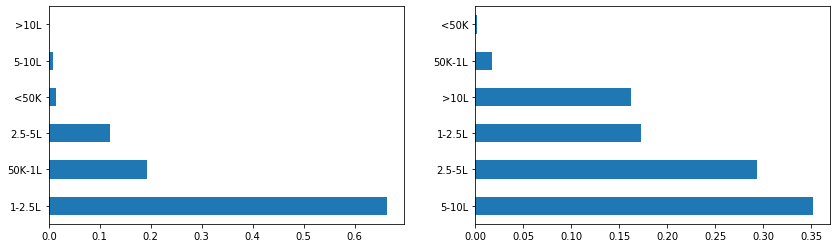

In [69]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1.Income_Bin.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
curr_app1.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.show()

### Q8. Identify if there is data imbalance in the data. Find the ratio of data imbalance.

        Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.
        
        Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)



In [70]:
curr_app1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

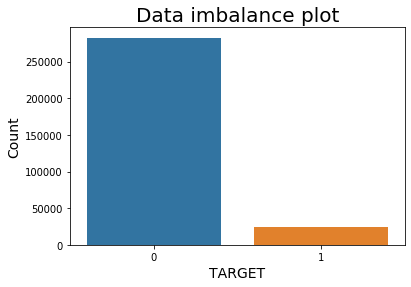

In [71]:
sns.barplot(x=curr_app1.TARGET.value_counts().index, y = curr_app1.TARGET.value_counts().values)
plt.xlabel("TARGET", size=14)
plt.ylabel("Count", size=14)
plt.title("Data imbalance plot", size=20)
plt.show()

### 9. Create two dataframes using target column (0, 1). Then do the univariate and bivariate analysis
    - We can take only 20-25 columns for performing univariate and bivariate analysis
    - Univariate: 
        - Categorical
        - Continuous
    - Bivariate: 
        - Categorical - Categorical
        - Categorical - Continuous
        - Continuous - Continuous
    - min 5 plots for each analysis (Total 25 plots)
#### Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.


In [72]:
curr_app1_1 = curr_app1[curr_app1.TARGET==1]
curr_app1_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637               3648   
26                    0.018029       18724           2628               6573   
40                    0.025164       17482           1262               1182   
42                    0.007305       13384           3597                 45   
81                    0.028663       24794         365243               5391   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers                1   
26                 1           0           0   Cooking staff                1   
40                 1           0           0        Laborers                2   
42                 1           1           0     Sales staff                2   
81                 1           0           0               0                2   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40               

In [73]:
curr_app1_1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

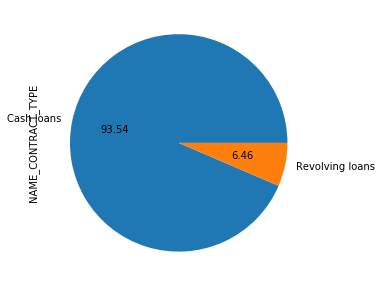

In [74]:
curr_app1_1['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

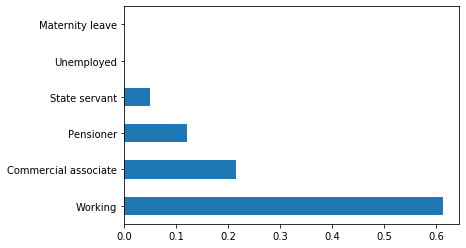

In [75]:
curr_app1_1['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

In [77]:
curr_app1_1['OCCUPATION_TYPE'].value_counts(normalize=True)

0                        0.252890
Laborers                 0.235166
Sales staff              0.124552
Drivers                  0.084874
Core staff               0.070010
Managers                 0.053494
Security staff           0.029084
High skill tech staff    0.028238
Cooking staff            0.025015
Medicine staff           0.023041
Accountants              0.019094
Cleaning staff           0.018006
Low-skill Laborers       0.014461
Private service staff    0.007049
Waiters/barmen staff     0.006123
Secretaries              0.003706
Realty agents            0.002377
HR staff                 0.001450
IT staff                 0.001370
Name: OCCUPATION_TYPE, dtype: float64

In [78]:
curr_app1_1['OCCUPATION_TYPE'].isnull().sum() ### What is this 0 value???

0

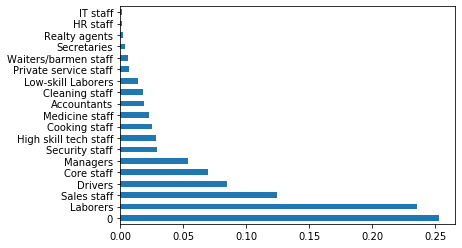

In [79]:
curr_app1_1['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

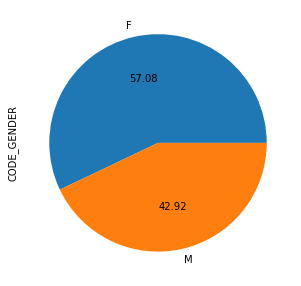

In [80]:
curr_app1_1['CODE_GENDER'].value_counts(normalize=True).plot.pie(figsize=(10,5), autopct='%.2f', fontsize=10)
plt.show()

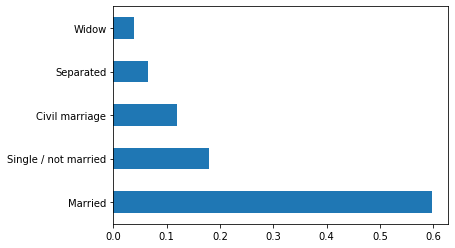

In [81]:
curr_app1_1['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.barh()
plt.show()

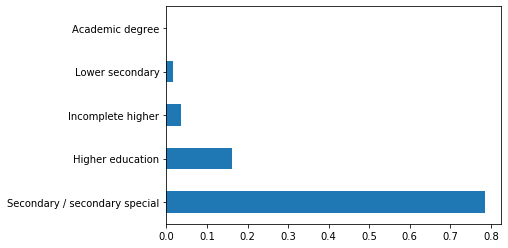

In [82]:
curr_app1_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

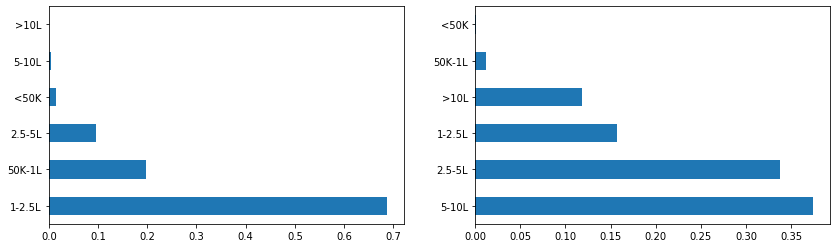

In [83]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1_1.Income_Bin.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
curr_app1_1.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.show()

#### Univariate analysis for continuous data in curr_app1_1

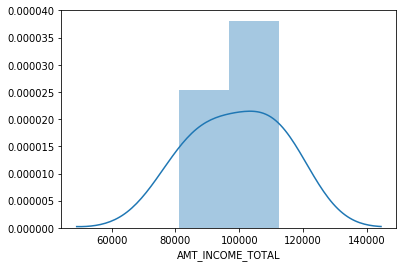

In [84]:
sns.distplot(curr_app1_1.AMT_INCOME_TOTAL.quantile([0.1, 0.15, 0.2, 0.25, 0.3]))
plt.show()

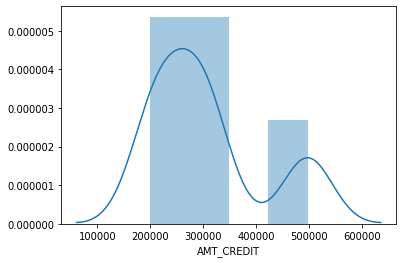

In [95]:
sns.distplot(curr_app1_1.AMT_CREDIT.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

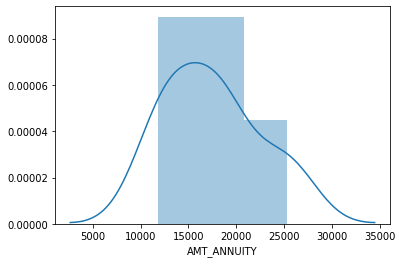

In [94]:
sns.distplot(curr_app1_1.AMT_ANNUITY.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

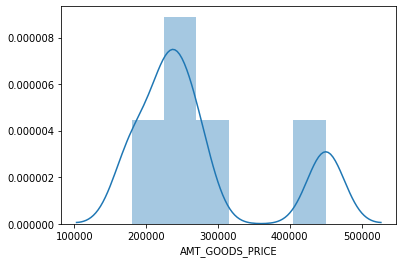

In [93]:
sns.distplot(curr_app1_1.AMT_GOODS_PRICE.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

In [96]:
curr_app1_0 = curr_app1[curr_app1.TARGET==0]
curr_app1_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   
5                    0.035792       16941           1588               4970   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   
5                 1           1           0        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

In [97]:
curr_app1_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.9021
Revolving loans    0.0979
Name: NAME_CONTRACT_TYPE, dtype: float64

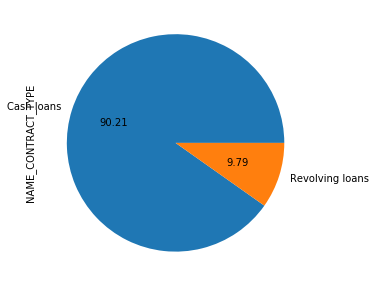

In [98]:
curr_app1_0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.pie(figsize=(10,5), 
                                                                        autopct='%.2f', fontsize=10)
plt.show()

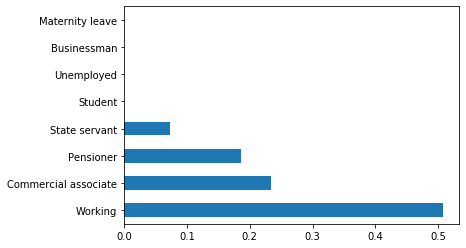

In [99]:
curr_app1_0['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

In [101]:
curr_app1_0['OCCUPATION_TYPE'].value_counts(normalize=True)

0                        0.318774
Laborers                 0.174568
Sales staff              0.102623
Core staff               0.091381
Managers                 0.070902
Drivers                  0.058354
High skill tech staff    0.037777
Accountants              0.033037
Medicine staff           0.028176
Security staff           0.021221
Cooking staff            0.018837
Cleaning staff           0.014879
Private service staff    0.008762
Low-skill Laborers       0.006134
Secretaries              0.004291
Waiters/barmen staff     0.004231
Realty agents            0.002448
HR staff                 0.001864
IT staff                 0.001740
Name: OCCUPATION_TYPE, dtype: float64

In [102]:
curr_app1_0['OCCUPATION_TYPE'].isnull().sum() ### What is this 0 value???

0

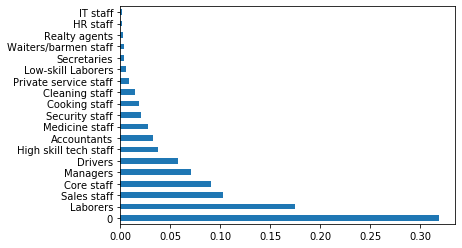

In [103]:
curr_app1_0['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

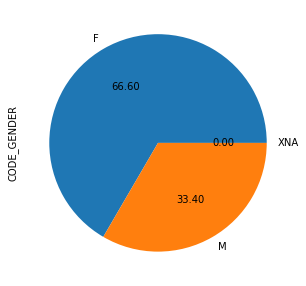

In [104]:
curr_app1_0['CODE_GENDER'].value_counts(normalize=True).plot.pie(figsize=(10,5), autopct='%.2f', fontsize=10)
plt.show()

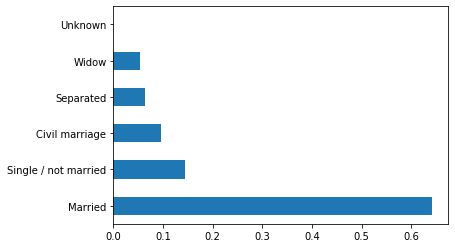

In [105]:
curr_app1_0['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.barh()
plt.show()

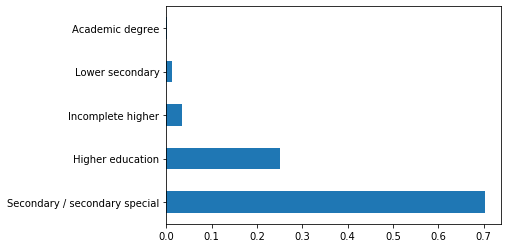

In [106]:
curr_app1_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

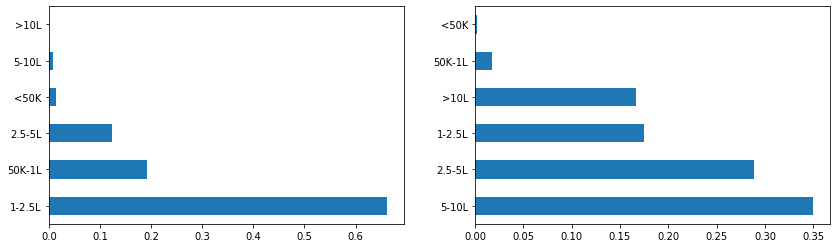

In [108]:
plt.figure(figsize=([14,4]))
plt.subplot(1,2,1)
curr_app1_0.Income_Bin.value_counts(normalize=True).plot.barh()
plt.subplot(1,2,2)
curr_app1_0.Credit_Bin.value_counts(normalize=True).plot.barh()
plt.show()

#### Univariate analysis for continuous data in curr_app1_0

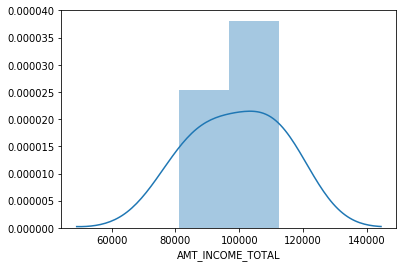

In [109]:
sns.distplot(curr_app1_0.AMT_INCOME_TOTAL.quantile([0.1, 0.15, 0.2, 0.25, 0.3]))
plt.show()

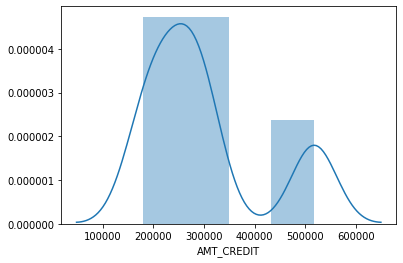

In [110]:
sns.distplot(curr_app1_0.AMT_CREDIT.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

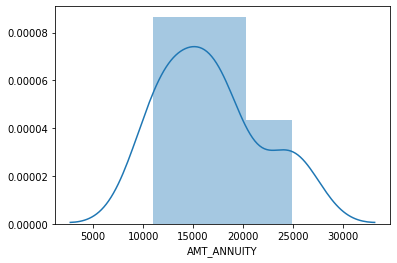

In [111]:
sns.distplot(curr_app1_0.AMT_ANNUITY.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

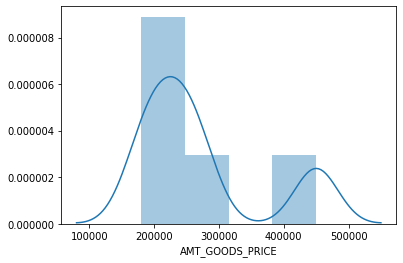

In [112]:
sns.distplot(curr_app1_0.AMT_GOODS_PRICE.quantile([0.1, 0.15, 0.25, 0.30, 0.5]))
plt.show()

### Bivariate analysis on curr_app1_1

In [249]:
curr_app1_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

##### Identified outlier ranges
- Income: <22500.0 and >337500.0
- Credit: <537975.0 and >1616625.0
- Annuity: <10584.0 and >61704.0
- Goods price: <423000.0 and >1341000.0
- External source scores: <0.018 and >1.07

In [125]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_1['AMT_INCOME_TOTAL'] = curr_app1_1[curr_app1_1['AMT_INCOME_TOTAL']<350000]

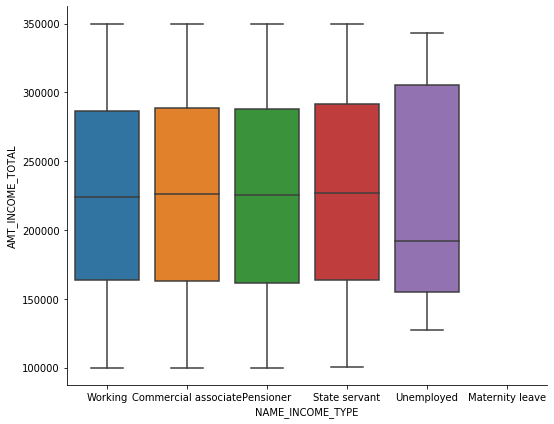

In [126]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

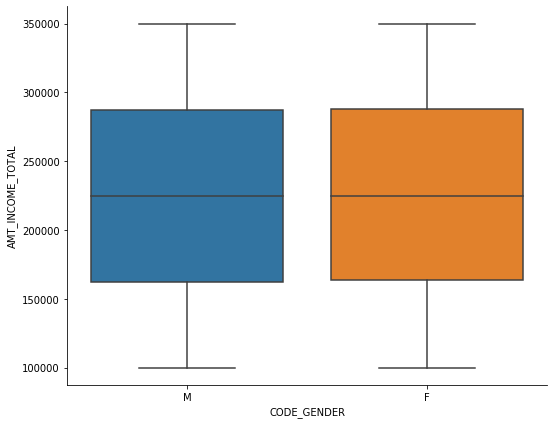

In [127]:
sns.catplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

In [121]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_1['AMT_CREDIT'] = curr_app1_1[curr_app1_1['AMT_CREDIT']<1616625]

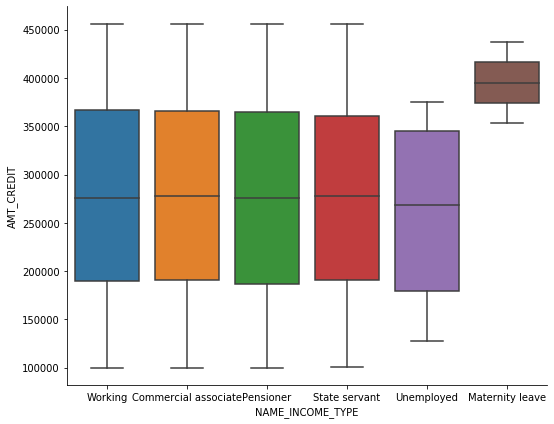

In [122]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

In [123]:
# Previously we identified the outliers in the income (>350000 are outliers)
curr_app1_1['AMT_ANNUITY'] = curr_app1_1[curr_app1_1['AMT_ANNUITY']<61704]

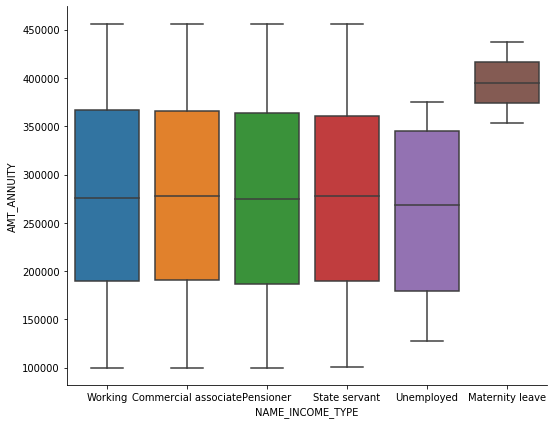

In [124]:
sns.catplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', data=curr_app1_1, kind="box", height=6, aspect=1.3)
plt.show()

In [199]:
curr_app1_0 = curr_app1[curr_app1.TARGET==0]
curr_app1_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   
5                    0.035792      -16941          -1588              -4970   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   
5             -477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   
5                 1           1           0        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

### Q10 Create two dataframes using target column (0, 1). Using these two sub dataframes we need to identify top 10 correlations (min 10 variables)
- Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  
    - Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. 
    - Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing. 

### Report Submission (ppt)
#### Include visualisations and summarise the most important results in the presentation. 
- You are free to choose the graphs which explain the numerical/categorical variables. 
- Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases.